## Import Libraries

In [21]:
import os
import sys
from pathlib import Path
sys.path.append(os.getcwd())
sys.path.append(str(Path(os.getcwd()).parent))
sys.path.append(os.path.join(os.getcwd(), 'utils'))
import matplotlib.pyplot as plt
from configuration import *
import torch
import numpy as np
import pprint
import pNN_Power_Aware as pNN
from utils import *

args = parser.parse_args([])
args = FormulateArgs(args)

args.powerestimator = 'AL'
args.act = 'hs'

## Constant values

In [22]:
target = [[ 200.,  240.,  400.,  500.,  300.,  300.,  200.,  300.,  600.,  280.,  340.,  280.,  240.],
          [ 400.,  480.,  800., 1000.,  600.,  600.,  400.,  600., 1200.,  560.,  680.,  560.,  480.],
          [ 600.,  720., 1200., 1500.,  900.,  900.,  600.,  900., 1800.,  840., 1020.,  840.,  720.],
          [ 800.,  960., 1600., 2000., 1200., 1200.,  800., 1200., 2400., 1120., 1360., 1120.,  960.]]

target = np.array(target)
target.shape

(4, 13)

## Check the number of devices

In [23]:
from tqdm.notebook import tqdm

devices_results = torch.zeros([10, 4, 13, 4])


for ds in tqdm(range(13), desc="Datasets"):
    args.DATASET = ds
    valid_loader, datainfo = GetDataLoader(args, 'valid', path='../dataset/')
    test_loader, datainfo = GetDataLoader(args, 'test', path='../dataset/')
    print(datainfo)

    for p, power in enumerate(tqdm(target[:,ds], desc="Power", leave=False)):
        
        args.powerbalance = power
        
        for seed in tqdm(range(10), desc="Seeds", leave=False):

            args.SEED = seed

            setup = f"data_{datainfo['dataname']}_seed_{args.SEED}_Penalty_{args.powerestimator}_Factor_{int(args.powerbalance):04d}"

            model_PT_name = f'../PowerAwareAugmentedLagrangianHS/models/pNN_{setup}.model'
            model_FT_name = f'../PowerAwareAugmentedLagrangianHS/models/pNN_{setup}_FT.model'
            
            try:
                model_PT = torch.load(model_PT_name)
            except Exception as e:
                print(f"Error loading model_PT: {model_PT_name}")
                print(e)
                continue
            
            try:
                model_FT = torch.load(model_FT_name)
            except Exception as e:
                print(f"Error loading model_FT: {model_FT_name}")
                print(e)
                continue
            
            devices_results[seed, p, ds, 0] = model_PT.soft_count_neg
            devices_results[seed, p, ds, 1] = model_PT.soft_count_act
            devices_results[seed, p, ds, 2] = model_FT.soft_count_theta
            devices_results[seed, p, ds, 3] = model_PT.soft_count_neg + model_PT.soft_count_act + model_FT.soft_count_theta

Datasets:   0%|          | 0/13 [00:00<?, ?it/s]

{'dataname': 'acuteinflammation', 'N_feature': 6, 'N_class': 2, 'N_train': 70, 'N_valid': 23, 'N_test': 25}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Error loading model_FT: ../PowerAwareAugmentedLagrangianHS/models/pNN_data_acuteinflammation_seed_1_Penalty_AL_Factor_0200_FT.model
[Errno 2] No such file or directory: '../PowerAwareAugmentedLagrangianHS/models/pNN_data_acuteinflammation_seed_1_Penalty_AL_Factor_0200_FT.model'
Error loading model_FT: ../PowerAwareAugmentedLagrangianHS/models/pNN_data_acuteinflammation_seed_5_Penalty_AL_Factor_0200_FT.model
[Errno 2] No such file or directory: '../PowerAwareAugmentedLagrangianHS/models/pNN_data_acuteinflammation_seed_5_Penalty_AL_Factor_0200_FT.model'


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'balancescale', 'N_feature': 4, 'N_class': 3, 'N_train': 373, 'N_valid': 124, 'N_test': 126}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'breastcancerwisc', 'N_feature': 9, 'N_class': 2, 'N_train': 418, 'N_valid': 139, 'N_test': 140}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'cardiotocography3clases', 'N_feature': 21, 'N_class': 3, 'N_train': 1274, 'N_valid': 424, 'N_test': 426}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'energyy1', 'N_feature': 8, 'N_class': 3, 'N_train': 459, 'N_valid': 153, 'N_test': 154}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'energyy2', 'N_feature': 8, 'N_class': 3, 'N_train': 459, 'N_valid': 153, 'N_test': 154}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'iris', 'N_feature': 4, 'N_class': 3, 'N_train': 88, 'N_valid': 29, 'N_test': 31}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'mammographic', 'N_feature': 5, 'N_class': 2, 'N_train': 575, 'N_valid': 191, 'N_test': 193}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'Pendigits', 'N_feature': 16, 'N_class': 10, 'N_train': 2198, 'N_valid': 732, 'N_test': 733}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'seeds', 'N_feature': 7, 'N_class': 3, 'N_train': 124, 'N_valid': 41, 'N_test': 43}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'tictactoe', 'N_feature': 9, 'N_class': 2, 'N_train': 573, 'N_valid': 191, 'N_test': 192}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'vertebralcolumn2clases', 'N_feature': 6, 'N_class': 2, 'N_train': 184, 'N_valid': 61, 'N_test': 63}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'vertebralcolumn3clases', 'N_feature': 6, 'N_class': 3, 'N_train': 184, 'N_valid': 61, 'N_test': 63}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

In [24]:
torch.save(devices_results, f'../RESULT/devices_result_AL_{args.act}.matrix')

## Check the model existence

In [3]:
from tqdm.notebook import tqdm


for ds in tqdm(range(13), desc="Datasets"):
    args.DATASET = ds
    valid_loader, datainfo = GetDataLoader(args, 'valid', path='../dataset/')
    test_loader, datainfo = GetDataLoader(args, 'test', path='../dataset/')
    print(datainfo)

    for p, power in enumerate(tqdm(target[:,ds], desc="Power", leave=False)):
        
        args.powerbalance = power
        
        for seed in tqdm(range(10), desc="Seeds", leave=False):

            args.SEED = seed

            setup = f"data_{datainfo['dataname']}_seed_{args.SEED}_Penalty_{args.powerestimator}_Factor_{int(args.powerbalance):04d}"

            model_PT_name = f'./models/pNN_{setup}.model'
            model_FT_name = f'./models/pNN_{setup}_FT.model'
            
            try:
                model_PT = torch.load(model_PT_name)
            except Exception as e:
                print(f"Error loading model_PT: {model_PT_name}")
                print(e)
                continue
            
            try:
                model_FT = torch.load(model_FT_name)
            except Exception as e:
                print(f"Error loading model_FT: {model_FT_name}")
                print(e)
                continue


Datasets:   0%|          | 0/13 [00:00<?, ?it/s]

{'dataname': 'acuteinflammation', 'N_feature': 6, 'N_class': 2, 'N_train': 70, 'N_valid': 23, 'N_test': 25}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'balancescale', 'N_feature': 4, 'N_class': 3, 'N_train': 373, 'N_valid': 124, 'N_test': 126}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'breastcancerwisc', 'N_feature': 9, 'N_class': 2, 'N_train': 418, 'N_valid': 139, 'N_test': 140}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'cardiotocography3clases', 'N_feature': 21, 'N_class': 3, 'N_train': 1274, 'N_valid': 424, 'N_test': 426}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'energyy1', 'N_feature': 8, 'N_class': 3, 'N_train': 459, 'N_valid': 153, 'N_test': 154}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'energyy2', 'N_feature': 8, 'N_class': 3, 'N_train': 459, 'N_valid': 153, 'N_test': 154}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'iris', 'N_feature': 4, 'N_class': 3, 'N_train': 88, 'N_valid': 29, 'N_test': 31}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'mammographic', 'N_feature': 5, 'N_class': 2, 'N_train': 575, 'N_valid': 191, 'N_test': 193}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'Pendigits', 'N_feature': 16, 'N_class': 10, 'N_train': 2198, 'N_valid': 732, 'N_test': 733}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Error loading model_PT: ./models/pNN_data_Pendigits_seed_0_Penalty_AL_Factor_0600.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_0_Penalty_AL_Factor_0600.model'
Error loading model_FT: ./models/pNN_data_Pendigits_seed_1_Penalty_AL_Factor_0600_FT.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_1_Penalty_AL_Factor_0600_FT.model'
Error loading model_FT: ./models/pNN_data_Pendigits_seed_2_Penalty_AL_Factor_0600_FT.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_2_Penalty_AL_Factor_0600_FT.model'
Error loading model_FT: ./models/pNN_data_Pendigits_seed_3_Penalty_AL_Factor_0600_FT.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_3_Penalty_AL_Factor_0600_FT.model'
Error loading model_FT: ./models/pNN_data_Pendigits_seed_6_Penalty_AL_Factor_0600_FT.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_6_Penalty_AL_Factor_0600_FT.model'


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Error loading model_PT: ./models/pNN_data_Pendigits_seed_0_Penalty_AL_Factor_1200.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_0_Penalty_AL_Factor_1200.model'
Error loading model_FT: ./models/pNN_data_Pendigits_seed_1_Penalty_AL_Factor_1200_FT.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_1_Penalty_AL_Factor_1200_FT.model'
Error loading model_FT: ./models/pNN_data_Pendigits_seed_2_Penalty_AL_Factor_1200_FT.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_2_Penalty_AL_Factor_1200_FT.model'
Error loading model_PT: ./models/pNN_data_Pendigits_seed_4_Penalty_AL_Factor_1200.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_4_Penalty_AL_Factor_1200.model'
Error loading model_FT: ./models/pNN_data_Pendigits_seed_9_Penalty_AL_Factor_1200_FT.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_9_Penalty_AL_Factor_1200_FT.model'


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Error loading model_PT: ./models/pNN_data_Pendigits_seed_0_Penalty_AL_Factor_1800.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_0_Penalty_AL_Factor_1800.model'
Error loading model_PT: ./models/pNN_data_Pendigits_seed_3_Penalty_AL_Factor_1800.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_3_Penalty_AL_Factor_1800.model'
Error loading model_PT: ./models/pNN_data_Pendigits_seed_4_Penalty_AL_Factor_1800.model
[Errno 2] No such file or directory: './models/pNN_data_Pendigits_seed_4_Penalty_AL_Factor_1800.model'


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'seeds', 'N_feature': 7, 'N_class': 3, 'N_train': 124, 'N_valid': 41, 'N_test': 43}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'tictactoe', 'N_feature': 9, 'N_class': 2, 'N_train': 573, 'N_valid': 191, 'N_test': 192}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'vertebralcolumn2clases', 'N_feature': 6, 'N_class': 2, 'N_train': 184, 'N_valid': 61, 'N_test': 63}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

{'dataname': 'vertebralcolumn3clases', 'N_feature': 6, 'N_class': 3, 'N_train': 184, 'N_valid': 61, 'N_test': 63}


Power:   0%|          | 0/4 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

## Evalute model on val-test set + power

In [ ]:
from tqdm.notebook import tqdm

results = torch.zeros([10, 4, 13, 8])

evaluator = Evaluator(args).to(args.DEVICE)

for ds in tqdm(range(13), desc="Datasets"):
    args.DATASET = ds
    valid_loader, datainfo = GetDataLoader(args, 'valid', path='../dataset/')
    test_loader, datainfo = GetDataLoader(args, 'test', path='../dataset/')
    print(datainfo)

    for p, power in enumerate(tqdm(target[:,ds], desc="Power", leave=False)):
        
        args.powerbalance = power
        
        for seed in tqdm(range(10), desc="Seeds", leave=False):

            args.SEED = seed
            
            for x, y in valid_loader:
                X_valid, y_valid = x.to(args.DEVICE), y.to(args.DEVICE)
            for x, y in test_loader:
                X_test, y_test = x.to(args.DEVICE), y.to(args.DEVICE)

            setup = f"data_{datainfo['dataname']}_seed_{args.SEED}_Penalty_{args.powerestimator}_Factor_{int(args.powerbalance):04d}"

            model_PT_name = f'./models/pNN_{setup}.model'
            model_FT_name = f'./models/pNN_{setup}_FT.model'
            # model_FT_RESET_name = f'./models/pNN_{setup}_FT_reset.model'
            
            try:
                model_PT = torch.load(model_PT_name)
            except Exception as e:
                print(f"Error loading model_PT: {model_PT_name}")
                print(e)
                continue
            
            try:
                model_FT = torch.load(model_FT_name)
            except Exception as e:
                print(f"Error loading model_FT: {model_FT_name}")
                print(e)
                continue

            # try:
            #     model_FT_RESET = torch.load(model_FT_RESET_name)
            # except Exception as e:
            #     print(f"Error loading model_FT: {model_FT_RESET_name}")
            #     print(e)
            #     continue
            
            acc_valid_pt, power_valid_pt = evaluator(model_PT, X_valid, y_valid)
            acc_test_pt, power_test_pt = evaluator(model_PT, X_test, y_test)

            acc_valid_ft, power_valid_ft = evaluator(model_FT, X_valid, y_valid)
            acc_test_ft, power_test_ft = evaluator(model_FT, X_test, y_test)

            # acc_valid_ft_reset, power_valid_ft_reset = evaluator(model_FT_RESET, X_valid, y_valid)
            # acc_test_ft_reset, power_test_ft_reset = evaluator(model_FT_RESET, X_test, y_test)
            
            results[seed, p, ds, 0] = acc_valid_pt
            results[seed, p, ds, 1] = power_valid_pt.cpu().item() * 1000000
            results[seed, p, ds, 2] = acc_test_pt
            results[seed, p, ds, 3] = power_test_pt.cpu().item() * 1000000

            results[seed, p, ds, 4] = acc_valid_ft
            results[seed, p, ds, 5] = power_valid_ft.cpu().item() * 1000000
            results[seed, p, ds, 6] = acc_test_ft
            results[seed, p, ds, 7] = power_test_ft.cpu().item() * 1000000

            # results[seed, p, ds, 8] = acc_valid_ft_reset
            # results[seed, p, ds, 9] = power_valid_ft_reset.cpu().item() * 1000000
            # results[seed, p, ds, 10] = acc_test_ft_reset
            # results[seed, p, ds, 11] = power_test_ft_reset.cpu().item() * 1000000


In [ ]:
# torch.save(results, './result.matrix')
# torch.save(results, '../RESULT/result_AL_hs.matrix')

## Visualize data

### Load data

In [6]:
results = torch.load('./result.matrix')
results.shape

torch.Size([10, 4, 13, 8])

In [7]:
sys.path.append('../utils/')
import FigureConfig as FC

In [8]:
ds = 5
result_temp = results[:,:,ds,:]
result_temp.shape

torch.Size([10, 4, 8])

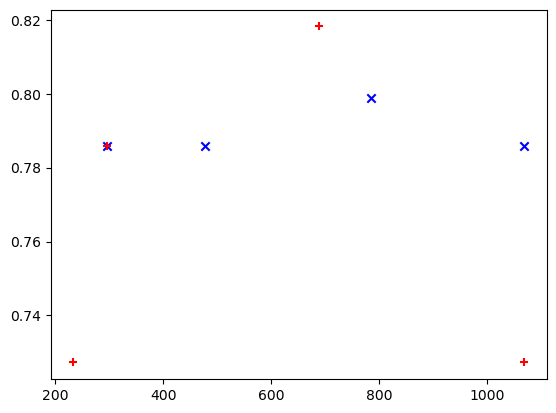

In [10]:
plt.figure()
for i in range(4):
    idx = torch.argmax(result_temp[:,i,2].flatten())
    plt.scatter(result_temp[idx,i,3],result_temp[idx,i,2], color = 'blue', label = 'PT', marker = 'x')
    plt.scatter(result_temp[idx,i,7],result_temp[idx,i,6], color = 'red', label = 'FT', marker = '+')
    # plt.scatter(result_temp[idx,i,11],result_temp[idx,i,10], color = 'orange')

In [11]:
result_temp[:,1,2].flatten(), torch.argmax(result_temp[:,1,2].flatten())

(tensor([0.7662, 0.7273, 0.7273, 0.7273, 0.7273, 0.7273, 0.7273, 0.7273, 0.7857,
         0.7662]),
 tensor(8))